In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.contrib import rnn

In [25]:
LSTM_size = 10         #ammount of neurons in our hidden layer
x_input_size = 107     #the size of the frequency representation of chunk
#x_chunk_sze = 100     #ammount of chunks to fill 1 second of song
dynamic_step_size = 10000  #total size of song i.e. seconds*(chunk*100)
batch_size = 5         #arbitrary batch size
learning_rate = 0.00   #learning rate
ammount_of_songs = 30  #ammount of songs the network can identify

In [27]:
out_weights=tf.Variable(tf.random_normal([LSTM_size,ammount_of_songs])) #initilize weights for output
out_bias=tf.Variable(tf.random_normal([ammount_of_songs]))              #initialize biases for output

x=tf.placeholder("float",[None,dynamic_step_size,x_input_size])         #initialize input placeholder
y=tf.placeholder("float",[None,ammount_of_songs])                       #initialize output placeholder

In [28]:
input=tf.unstack(x,dynamic_step_size,1) 
# creates the [batch_size,x_input_size] which we want to assign static_rnn

In [29]:
lstm_hidden_layer=rnn.BasicLSTMCell(LSTM_size,forget_bias=1)       #defines our hidden layer
outputs,_=rnn.static_rnn(lstm_hidden_layer,input,dtype="float32")  #handles output

In [30]:
prediction=tf.matmul(outputs[-1],out_weights)+out_bias             #predicts the song

In [32]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
opt=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



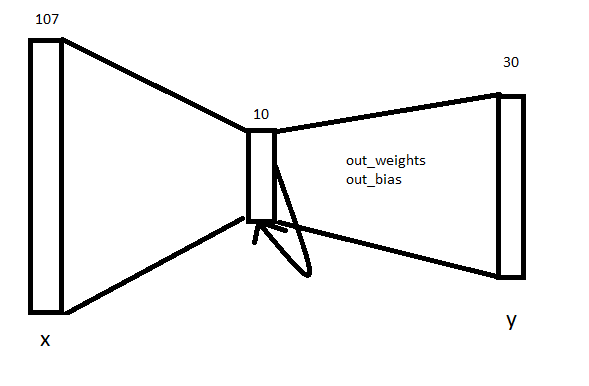